# <font color="red">Data pre-processing and exploration activities with the Global Shark Attack File</font>

## <font color="Dodgerblue">Data Cleaning and Prep Challenge 1</font>

## <font color="green">Research objective : Binned Time of attack for USA attacks (by state, region, overall)</font>

### Group 3

#### <b>Group Members :</b>
- <b>Bharadwaj Aryasomayajula</b>
 
 
- <b>Mahanth Mukesh</b>
 
 
- <b>Akhil Morampudi</b>
 
 
- <b>Ravi Theja Goalla</b>


In [1]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objects as go

### Read the dataset file

In [2]:
df = pd.read_excel('GSAF5-1.xls')

### The below methods are used to delete all the leading and trailing characters mentioned in its argument.

In [3]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.rstrip()

In [4]:
#to get a quick overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 24 columns):
Case Number               8739 non-null object
Date                      6451 non-null object
Year                      6449 non-null float64
Type                      6447 non-null object
Country                   6401 non-null object
Area                      5988 non-null object
Location                  5904 non-null object
Activity                  5901 non-null object
Name                      6241 non-null object
Sex                       5886 non-null object
Age                       3586 non-null object
Injury                    6423 non-null object
Fatal (Y/N)               5905 non-null object
Time                      3064 non-null object
Species                   3545 non-null object
Investigator or Source    6434 non-null object
pdf                       6451 non-null object
href formula              6449 non-null object
href                      6451 non-null obje

In [5]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


In [6]:
#Select the data from the dataset where country is USA and all the data no less than 1995
df=df[df.Year>1999]
df=df[df.Country=='USA']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 24 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null object
Country                   1087 non-null object
Area                      1087 non-null object
Location                  1080 non-null object
Activity                  1036 non-null object
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null object
Ca

In [8]:
df.Area=df.Area

In [9]:
#Capitalize all the entities present in Area Column to Upper case
df.Area= [str(x).upper() for x in df.Area.tolist()]
df.Area.head()

0    FLORIDA
1    FLORIDA
2     HAWAII
3    FLORIDA
4     HAWAII
Name: Area, dtype: object

In [10]:
df.Area.value_counts()

FLORIDA              572
HAWAII               139
CALIFORNIA           120
SOUTH CAROLINA        80
NORTH CAROLINA        68
TEXAS                 34
OREGON                15
ALABAMA                9
MASSACHUSETTS          8
NEW JERSEY             6
NEW YORK               5
LOUISIANA              4
GEORGIA                4
MARYLAND               3
PUERTO RICO            3
VIRGINIA               3
DELAWARE               2
PALMYRA ATOLL          2
RHODE ISLAND           1
NEW MEXICO             1
SOUTH CAROLINA         1
ALASKA                 1
MAINE                  1
GUAM                   1
JOHNSTON ATOLL         1
KENTUCKY               1
WASHINGTON             1
US VIRGIN ISLANDS      1
Name: Area, dtype: int64

### Binning of Areas into various regions depending on the coastal region they are located

- Description of the Regions
 -  North Atlantic: the states whose land frontiers are the coastal Regions lying on the North Atlantic Coast
 -  Middle Atlantic: the states whose land frontiers are the coastal Regions lying on the Middle Atlantic Coast
 -  South Atlantic: the states whose land frontiers are the coastal Regions lying on the South Atlantic Coast
 -  North Pacific: the states whose land frontiers are the coastal Regions lying on the North Pacific Coast
 -  South Pacific: the states whose land frontiers are the coastal Regions lying on the South Pacific Coast
 -  Gulf:the states whose land frontiers are the coastal Regions lying on the Gulf coast 

In [11]:
North_Atlantic=  ['connecticut', 'maine', 'massachusetts', 'new hampshire', 'rhode island', 'vermont']
Mid_Atlantic = ['new jersey', 'new york', 'pennsylvania']
South_Atlantic =[ 'delaware', 'florida', 'georgia', 'maryland', 'north carolina', 'south carolina', 'virginia', 'district of columbia', 'west virginia']
North_Pacific= ['alaska', 'oregon', 'washington']
South_Pacific = ['california', 'hawaii','palmyra atoll', 'johnston atoll']
Gulf=['texas', 'alabama', 'louisiana', 'new mexico', 'mississippi']
#atlantic= ['florida', 'north carolina', 'rhode island','georgia', 'new jersey', 'massachusetts', 'maryland', 'new york', 'south carolina', 'washington', 'delaware', 'puerto rico', 'maine',
#       'virginia', 'us virgin islands', 'guam', 'south carolina ', ]




#pacific=['Hawaii','california', 'oregon', 'palmyra atoll', 'johnston atoll', 'alaska']

#Capitalize all the strings present in the above list
North_Atlantic = [x.upper() for x in North_Atlantic]

Mid_Atlantic = [x.upper() for x in Mid_Atlantic]

South_Atlantic = [x.upper() for x in South_Atlantic]
North_Pacific = [x.upper() for x in North_Pacific]
South_Pacific = [x.upper() for x in South_Pacific]
Gulf = [x.upper() for x in Gulf]


### This function takes Area values and groups it to the respective regions.

In [12]:
def get_region(x):
    if x in North_Atlantic:
        return "North Atlantic Region"
    elif x in Mid_Atlantic:
        return "Mid Atlantic Region"
    elif x in South_Atlantic:
        return "South Atlantic Region"
    elif x in North_Pacific:
        return "North Pacific Region"
    elif x in South_Pacific:
        return "South Pacific Region"
    elif x in Gulf:
        return "Gulf Region"

df['Region'] = df['Area'].apply(lambda x: get_region(x))

In [13]:
#Binning of the data according to regions
df['Region'].head()

0    South Atlantic Region
1    South Atlantic Region
2     South Pacific Region
3    South Atlantic Region
4     South Pacific Region
Name: Region, dtype: object

### Show the counts of observations in each categorical region bins using bars

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

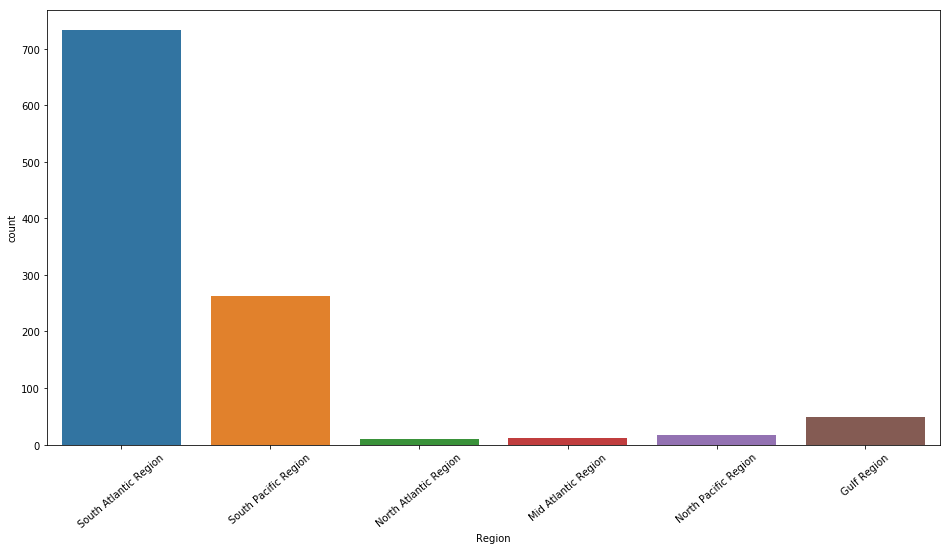

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Region', data=df)
plt.xticks(rotation =40)

<b> As per the above plt, it can be primarily inferred that the Shark Attacks are predominant in the South Atlantic region.</b>

#### Categorical Variables

According to the below inference the categorical variables present in the dataset are as follows:
- Type
- Country
- Area
- Location
- Activity


In [15]:
df.Type=df.Type.astype('category')
df.Country=df.Country.astype('category')
df.Area=df.Area.astype('category')
df.Location=df.Location.astype('category')
df.Activity=df.Activity.astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 25 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null category
Country                   1087 non-null category
Area                      1087 non-null category
Location                  1080 non-null category
Activity                  1036 non-null category
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null

In [17]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Region
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,FLORIDA,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN,South Atlantic Region
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,FLORIDA,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN,South Atlantic Region
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,HAWAII,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN,South Pacific Region
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,FLORIDA,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN,South Atlantic Region
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,HAWAII,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN,South Pacific Region


In [18]:
#count the number of Null Vaslues
df.isna().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     7
Activity                    51
Name                        10
Sex                         28
Age                        215
Injury                       0
Fatal (Y/N)                 64
Time                       187
Species                    411
Investigator or Source       2
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               1086
Unnamed: 23               1087
Region                       7
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 25 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null category
Country                   1087 non-null category
Area                      1087 non-null category
Location                  1080 non-null category
Activity                  1036 non-null category
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null

In [20]:
#Replace occurrences of pattern/regex in the Series/Index with some other string
df['Hour_Clean']=df['Time'].str.replace("Morning","06h00")
df['Hour_Clean'] = np.where(df['Hour_Clean'].str.contains(("noon")), "14h00", df['Hour_Clean'])
df['Hour_Clean'] = np.where(df['Hour_Clean'].str.contains(("night")), "20h00", df['Hour_Clean'])
df['Hour_Clean'] = np.where(df['Hour_Clean'].str.contains(("morning")), "08h00", df['Hour_Clean'])
df['Hour_Clean'] = np.where(df['Hour_Clean'].str.contains(("vening")), "20h00", df['Hour_Clean'])
df['Hour_Clean'] = np.where(df['Hour_Clean'].str.contains(("sun")), "18h00", df['Hour_Clean'])
df['Hour_Clean']=df['Hour_Clean'].str.replace("Night","20h00")
df['Hour_Clean']=df['Hour_Clean'].str.replace("Sunset","18h00")
df['Hour_Clean']=df['Hour_Clean'].str.replace("Dusk","18h00")
df['Hour_Clean'].head()

0    11h55
1    09h00
2    08h00
3    11h00
4    19h30
Name: Hour_Clean, dtype: object

In [21]:
df['Hour_Clean'].isna().sum()

0

In [22]:
#Use regular expression to extract the Time only in hours in 24 Hr Time format and negating all other time data
df['Hour_Clean'] = df['Hour_Clean'].str.extract("([0-9]+[h]+[0-9]+)", expand=False).str.strip()

In [23]:
df['Hour_Clean'].head()

0    11h55
1    09h00
2    08h00
3    11h00
4    19h30
Name: Hour_Clean, dtype: object

In [24]:
df['Hour_Clean'].isna().sum()

7

In [25]:
#Replace occurrences of pattern/regex in the Series/Index with some other string
df['Hour_Clean']=df['Hour_Clean'].str.replace("h",".")
df['Hour_Clean'].head()

0    11.55
1    09.00
2    08.00
3    11.00
4    19.30
Name: Hour_Clean, dtype: object

In [26]:
#Calculate the mode of the Time column in the dataset and replace the missing the values with the mode
print("As there are only 10 Nan Values, they can be replaced by the mode of the data, which is", df.Hour_Clean.mode().values)

As there are only 10 Nan Values, they can be replaced by the mode of the data, which is ['14.00']


In [27]:
#Convert argument to a numeric type.The default return dtype is float64 or int64 depending on the data supplied.
df['Hour_Clean'] = pd.to_numeric(df['Hour_Clean'], errors='coerce').fillna(11).astype(np.int64)

In [28]:
df['Hour_Clean'].head(10)

0    11
1     9
2     8
3    11
4    19
5    15
6    16
7    15
8    14
9    14
Name: Hour_Clean, dtype: int64

In [29]:
df['Hour_Clean'].describe()

count    1087.000000
mean       13.307268
std         3.197227
min         0.000000
25%        11.000000
50%        14.000000
75%        15.000000
max        23.000000
Name: Hour_Clean, dtype: float64

## Binning of Time into various bins depending on the time ranges in a day

Description of the Bin labels as per 24 HH clock format

- 00 - 05 : mid night
- 05 - 11 : morning
- 12 - 15 : afternoon
- 15 - 19 : evening
- 19 - 25 : night



In [30]:
bins = [-1, 5, 11, 15, 19, 25]
df['binned'] = pd.cut(df['Hour_Clean'], bins=bins, labels = ['Mid night', 'Morning' ,'Afternoon' ,'Evening' ,'Night'])

In [31]:
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,Region,Hour_Clean,binned
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,FLORIDA,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN,South Atlantic Region,11,Morning
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,FLORIDA,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN,South Atlantic Region,9,Morning
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,HAWAII,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN,South Pacific Region,8,Morning
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,FLORIDA,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN,South Atlantic Region,11,Morning
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,HAWAII,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN,South Pacific Region,19,Evening


### Show the counts of observations in two categorical varibles: region bins based on the binning time using bars

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

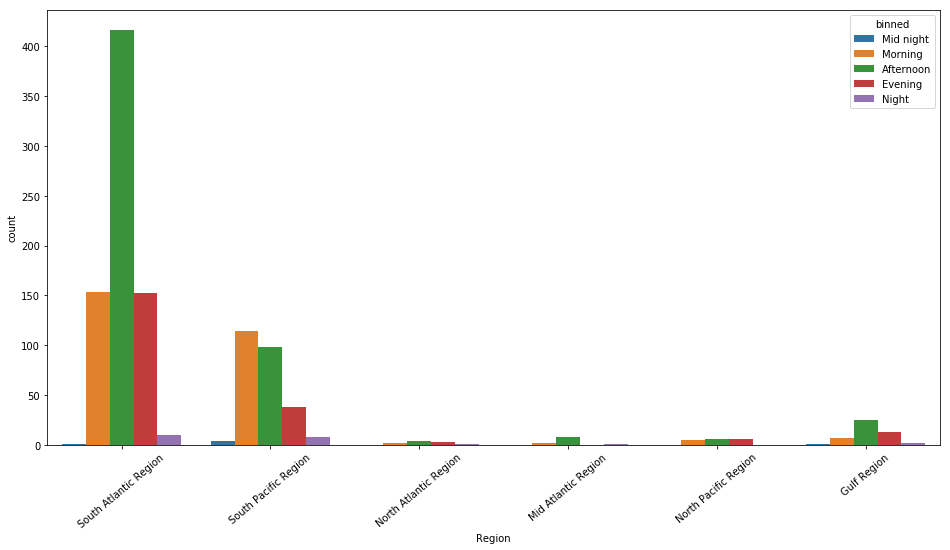

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Region', hue='binned', data=df)
plt.xticks(rotation =40)

<b>From the above graph it can be inferred that the shark attacks are predominant in the Souht Atlantic region and mostly happen in the Afternoon time, where as the second highest attacks occured in South Pacific Region in the morning time</b>

### Show the counts of observations in each "Area" bins rusing bars

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

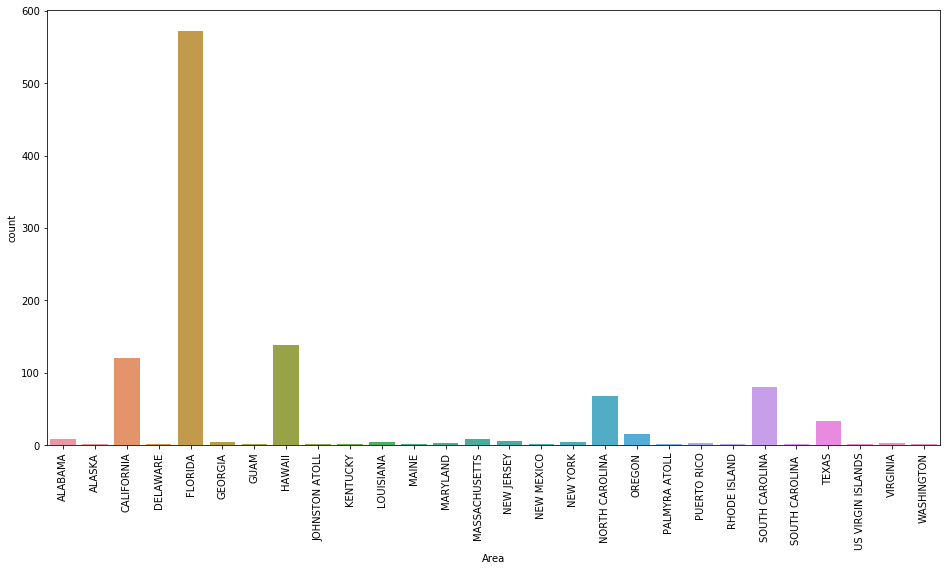

In [33]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='Area' , data=df)
plt.xticks(rotation =90)

<b> From the above plot it can be inferred that most of the shark attacks taking place in USA are predominant in the Atlantic cost and occur during the Afternoon time. The highest number of shark attacks happen in the state of "FLORIDA"</b>

In [34]:
df['Code']=df.Area

In [35]:
df['Code']=df['Code'].str.replace('FLORIDA', 'FL')
df['Code']=df['Code'].str.replace('HAWAII', 'HI')
df['Code']=df['Code'].str.replace('NORTH CAROLINA', 'NC')
df['Code']=df['Code'].str.replace('RHODE ISLAND', 'RI')
df['Code']=df['Code'].str.replace('GEORGIA', 'GA')
df['Code']=df['Code'].str.replace('NEW JERSEY', 'NJ')
df['Code']=df['Code'].str.replace('TEXAS', 'TX')
df['Code']=df['Code'].str.replace('CALIFORNIA', 'CA')
df['Code']=df['Code'].str.replace('ALABAMA', 'AL')
df['Code']=df['Code'].str.replace('LOUISIANA', 'LA')
df['Code']=df['Code'].str.replace('SOUTH CAROLINA', 'SC')
df['Code']=df['Code'].str.replace('OREGON', 'OR')
df['Code']=df['Code'].str.replace('MARYLAND', 'MD')
df['Code']=df['Code'].str.replace('NEW YORK', 'NY')
df['Code']=df['Code'].str.replace('MASSACHUSETTS', 'MA')
df['Code']=df['Code'].str.replace('PUERTO RICO', 'PR')
df['Code']=df['Code'].str.replace('PALMYRA ATOLL', 'HI')
df['Code']=df['Code'].str.replace('DELAWARE', 'DE')
df['Code']=df['Code'].str.replace('NEW MEXICO', 'NM')
df['Code']=df['Code'].str.replace('US VIRGIN ISLANDS', 'VI')
df['Code']=df['Code'].str.replace('GUAM', 'GU')
df['Code']=df['Code'].str.replace('ALASKA', 'AK')
df['Code']=df['Code'].str.replace('MAINE', 'ME')
df['Code']=df['Code'].str.replace('KENTUCKY', 'KY')
df['Code']=df['Code'].str.replace('WASHINGTON', 'WA')
df['Code']=df['Code'].str.replace('MAINE', 'ME')
df['Code']=df['Code'].str.replace('VIRGINIA', 'VA')
df['Code']=df['Code'].str.replace('JOHNSTON ATOLL', 'HI')
df['Code']=df['Code'].str.replace('MISSOURI', 'MO')
df['Code']=df['Code'].str.replace('MISSISSIPPI', 'MI')

In [36]:
df.Code.value_counts()

FL     572
HI     142
CA     120
SC      80
NC      68
TX      34
OR      15
AL       9
MA       8
NJ       6
NY       5
LA       4
GA       4
PR       3
VA       3
MD       3
DE       2
AK       1
RI       1
WA       1
GU       1
NM       1
VI       1
SC       1
ME       1
KY       1
Name: Code, dtype: int64

In [1]:
scl = [[0.0, 'rgb(242,240,247)'],[0.0025, 'rgb(218,218,235)'],[0.005, 'rgb(188,189,220)'],\
            [0.2, 'rgb(158,154,200)'],[0.7, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

fig = go.Figure(data=go.Choropleth(
        locations = df['Code'].value_counts().index,
        colorscale = scl,
        autocolorscale = False,
        z = df.Code.value_counts().values.astype(float),
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorbar_title = "Shark Attacks"
        
    ) )

fig.update_layout(
    title_text = 'Shark Attacks after 1990 by State in USA',
    geo_scope='usa', # limite map scope to USA
)


fig.show()

NameError: name 'go' is not defined